In [1]:
import pandas as pd
from utilidades_graficas import *

In [2]:
archivo_resultados = pd.read_csv('out.csv')
archivo_resultados.head()

,Unnamed: 0,platform,method,size,iterations,time,accuracy,dispersion
0,0,cuda,jacobi,100,8.0,0.057022,8.755864e-08,6.595632e-07
1,1,numpy,jacobi,100,8.0,0.000236,8.755864e-08,6.595632e-07
2,2,cuda,jacobi,100,8.0,0.056683,5.206201e-08,4.145551e-07
3,3,numpy,jacobi,100,8.0,0.000269,5.206201e-08,4.145551e-07
4,4,cuda,jacobi,100,8.0,0.055496,8.445252e-08,6.253834e-07


In [16]:
plataformas = archivo_resultados['platform'].unique()
metodos = archivo_resultados['method'].unique()
tamaños = archivo_resultados['size'].unique()
columnas = ['plataforma', 'metodo', 'tamaño', 'iteraciones_promedio', 'std_iteraciones',
            'tiempo_promedio', 'std_tiempo', 'precision_promedio', 'std_precision', 
            'dispersion_promedio', 'std_dispersion']
resultados = pd.DataFrame(columns=columnas)

for plataforma in plataformas:
    for metodo in metodos:
        for tamaño in tamaños:
            tabla = archivo_resultados.loc[archivo_resultados['platform'] == plataforma]
            tabla = tabla.loc[tabla['method'] == metodo]
            tabla = tabla.loc[tabla['size'] == tamaño]
            descripcion_iteraciones = describir(tabla['iterations'])
            descripcion_tiempo = describir(tabla['time'])
            descripcion_error = describir(tabla['accuracy'])
            descripcion_dispersion = describir(tabla['dispersion'])
            
            valores_fila = [[plataforma, metodo, tamaño] + descripcion_iteraciones +
                            descripcion_tiempo + descripcion_error + descripcion_dispersion]
            fila = pd.DataFrame(valores_fila, columns=columnas)
            resultados = resultados.append(fila, ignore_index=True)
            
resultados.head

<bound method NDFrame.head of    plataforma  metodo tamaño  iteraciones_promedio  std_iteraciones  \
0        cuda  jacobi    100                   8.1         0.316228   
1        cuda  jacobi    200                   7.0         0.000000   
2        cuda  jacobi    300                   7.0         0.000000   
3        cuda  jacobi    400                   7.0         0.000000   
4        cuda  jacobi    500                   6.0         0.000000   
5        cuda  jacobi    600                   6.0         0.000000   
6        cuda  jacobi    700                   6.0         0.000000   
7        cuda  jacobi    800                   6.0         0.000000   
8        cuda  jacobi    900                   6.0         0.000000   
9        cuda  jacobi   1000                   6.0         0.000000   
10       cuda  jacobi   1100                   6.0         0.000000   
11       cuda  jacobi   1200                   6.0         0.000000   
12       cuda  jacobi   1300                   

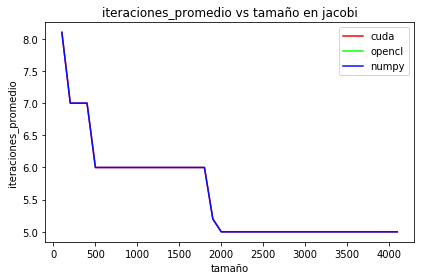

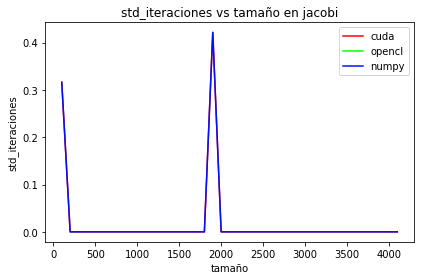

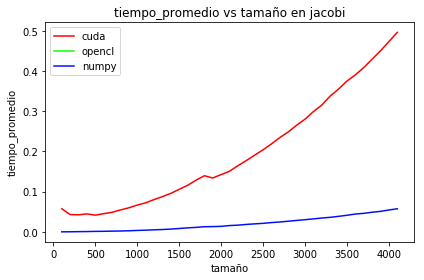

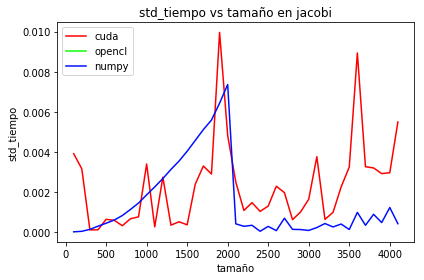

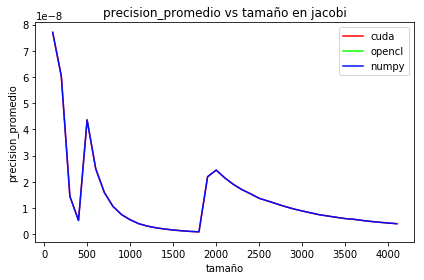

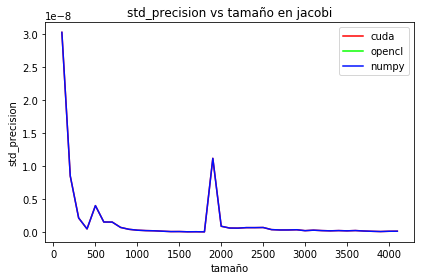

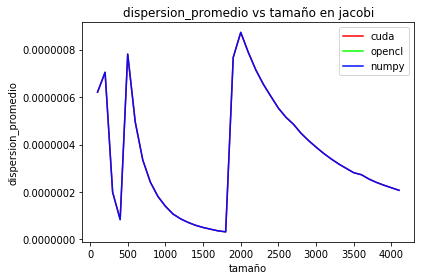

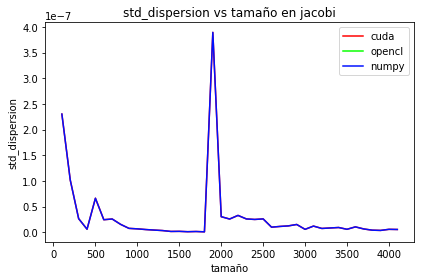

In [5]:
ys = columnas[3:]
for y in ys:
    for metodo in metodos:
        graficar(resultados, metodo=metodo, x='tamaño', y=y)